### Import Libraries

In [180]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import math

### Need category name and identity of spedific student. You can modify the dataframe based on your problem

In [181]:
col_list = ["Student.No", "Student.Semester.No","Grade.Points.Num", "Type"]
df = pd.read_csv("D:/MSCS/thesis2/final-codes-for-paper/transcript_data_with_course_grades_levels.csv", usecols=col_list)

### Prepare data for custom line charts 

In [182]:
def data_for_custom_chart(df, student_no):
    # empty nested dictionary to store data of all categories
    nested_dic = {}
    # Need to define the student number with category 
    # Here array belongs to type of all category
    type_arr = ['P','PL','NP','MT','EE', 'EL','MG', 'SS', 'SL']
    single_cat = 2
    #list to store the only category types which student take
    type_list = []
    for i in range(len(type_arr)):
        cat_df = df.loc[(df['Student.No'] == student_no) & (df['Type'] == type_arr[i])]
        if cat_df.empty:
            print(type_arr[i], " is empty")
        else:
            type_list.append(type_arr[i])
            cat_df = cat_df.sort_values(by='Student.Semester.No')
            # dictionary that all grade points of single semester 
            semwise_dict = defaultdict(list)
            unique_sem = cat_df['Student.Semester.No'].unique()
            # loop till total number of semesters
            for j in range(len(unique_sem)):
                df_semwise = cat_df.loc[(cat_df['Student.Semester.No'] == unique_sem[j])]
                col_values = df_semwise['Grade.Points.Num'].values
                semwise_dict[unique_sem[j]] = col_values.tolist()

            nested_dic[i] = semwise_dict
    return nested_dic, type_list, single_cat

### nested_dic and type_list used as an argument for single category and multiple category. The df defines the dataframe and second argument define the student number. You can mold the value according to your problem

In [183]:
nested_dic, type_list, single_cat = data_for_custom_chart(df, 506)

SL  is empty


### For single category customize min-max line chart defination

In [184]:
def single_category_customize_min_max_line_chart(data):
    category_types = ['P', 'PL', 'NP', 'MT', 'EE', 'EL', 'MG', 'SS', 'SL']
    category_type = category_types[single_cat] if single_cat < len(category_types) else 'Unknown'
    
    # maximum key value for the x-axis range
    n = max(data.keys())

    # to maintain the order keys are sorted
    sorted_keys = sorted(data.keys())

    # Plotting points for each key
    for i in range(len(sorted_keys)):
        x1 = sorted_keys[i]
        y_values = data[x1]

        # If only one point exist in single category
        if len(y_values) == 1:
            plt.scatter(x1, y_values[0], color='red')

        # If points are more than one then min and max points are connected and intermidiate points are plot as dots
        if i < len(sorted_keys) - 1:
            x2 = sorted_keys[i + 1]
            y1_min, y1_max = min(data[x1]), max(data[x1])
            y2_min, y2_max = min(data[x2]), max(data[x2])

            # for min points plot
            plt.plot([x1, x2], [y1_min, y2_min], marker='o', linestyle='-', color='red')

            # for max points plot
            plt.plot([x1, x2], [y1_max, y2_max], marker='o', linestyle='-', color='red')

            # Plot the intermediate points plot
            for y in data[x1]:
                if y != y1_min and y != y1_max:
                    plt.scatter(x1, y, color='red')
            for y in data[x2]:
                if y != y2_min and y != y2_max:
                    plt.scatter(x2, y, color='red')

    plt.xlim(1, n)
    plt.xticks(sorted_keys, [f'S-{i}' for i in sorted_keys], rotation=45)  # Only include x-axis points where data exists

    plt.xlabel('Semesters')
    plt.ylabel('Grade Points')
    plt.title(f'Student Trajectory {category_type}')

    plt.grid(True)
    plt.ylim(-0.5, 4.5)
    plt.xlim(-0.01, n + 0.9)

    plt.show()

### Function call

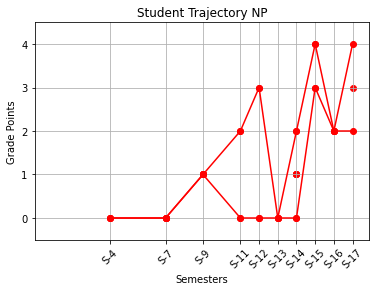

In [185]:
single_category_customize_min_max_line_chart(nested_dic[single_cat])

### For multiple category customize min-max line chart defination

In [186]:
def multiple_categories_customize_mix_max_line_chart(data, type_list):
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    # Number of rows and columns for the subplots in single frame
    num_plots = len(dict(data))
    num_cols = int(math.ceil(math.sqrt(num_plots)))
    num_rows = int(math.ceil(num_plots / num_cols))
    
    colors = cm.rainbow(np.linspace(0, 1, num_plots))
    
    # Grid of subplots with rows and columns
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))
    count = 0
    axes = axes.flatten()  # for easy iteration flat the axes

    # Iterate for line chart creation
    for ax, plot_data in zip(axes[:num_plots], dict(nested_dic).values()):
        color = colors[count % len(colors)]
        
        # Maximum key for the x-axis
        n = max(plot_data.keys())

        # Ordering the keys
        sorted_keys = sorted(plot_data.keys())

        # For each key plot line chart
        for i in range(len(sorted_keys)):
            x1 = sorted_keys[i]
            y_values = plot_data[x1]

            # If only one point exist in single category
            if len(y_values) == 1:
                ax.scatter(x1, y_values[0], color=color)

            # If more then one points exist than connect the min and max points and intemediate points as dots
            if i < len(sorted_keys) - 1:
                x2 = sorted_keys[i + 1]
                y1_min, y1_max = min(plot_data[x1]), max(plot_data[x1])
                y2_min, y2_max = min(plot_data[x2]), max(plot_data[x2])

                # for min points
                ax.plot([x1, x2], [y1_min, y2_min], marker='o', linestyle='-', color=color)

                # for max points
                ax.plot([x1, x2], [y1_max, y2_max], marker='o', linestyle='-', color=color)

                # Intermediate points
                for y in plot_data[x1]:
                    if y != y1_min and y != y1_max:
                        ax.scatter(x1, y, color=color)
                for y in plot_data[x2]:
                    if y != y2_min and y != y2_max:
                        ax.scatter(x2, y, color=color)

        ax.set_xlim(1, n)
        # Only include x-axis points where data exists
        ax.set_xticks(sorted_keys)
        ax.set_xticklabels([f'S-{i}' for i in sorted_keys], rotation=45)

        ax.set_xlabel('Semesters')
        ax.set_ylabel('Grade Points')
        abc = "123"
        ax.set_title('Student Trajectory('+f'{type_list[count]})')
        count = count + 1

        ax.grid(True)
        ax.set_ylim(-0.5, 4.5)
        ax.set_xlim(-0.01, n + 0.9)

    # unused subplot axes hide
    for ax in axes[num_plots:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

### Function call

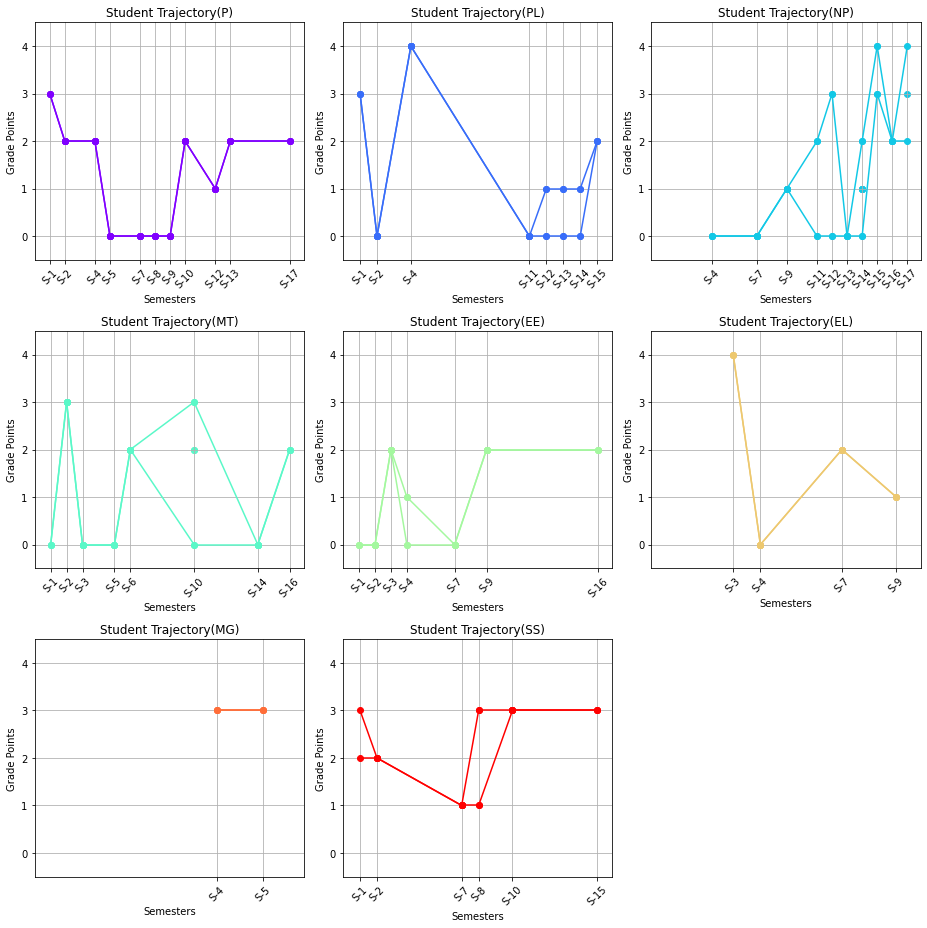

In [187]:
multiple_categories_customize_mix_max_line_chart(nested_dic, type_list)

### For single category customize median line chart defination

In [188]:
def single_category_customize_median_line_chart(data):
    category_types = ['P', 'PL', 'NP', 'MT', 'EE', 'EL', 'MG', 'SS', 'SL']
    category_type = category_types[single_cat] if single_cat < len(category_types) else 'Unknown'

    # Maximum key value for the x-axis range
    n = max(data.keys())

    # Sorted keys to maintain the order
    sorted_keys = sorted(data.keys())

    # Collecting median values for plotting the median line
    median_values = [np.median(data[key]) for key in sorted_keys]

    # Plotting points for each key
    for i in range(len(sorted_keys)):
        x1 = sorted_keys[i]
        y_median = np.median(data[x1])

        # Plotting the median point for each key
        plt.scatter(x1, y_median, color='red')

        # If points are more than one, connect the medians
        if i < len(sorted_keys) - 1:
            x2 = sorted_keys[i + 1]
            y1_median = np.median(data[x1])
            y2_median = np.median(data[x2])

            # Plot the median points connection
            plt.plot([x1, x2], [y1_median, y2_median], marker='o', linestyle='-', color='red')

    # Plotting the median line
    plt.plot(sorted_keys, median_values, marker='o', linestyle='-', color='blue', label='Median')

    plt.xticks(sorted_keys, [f'S-{i}' for i in sorted_keys], rotation=45)  # Only include x-axis points where data exists

    plt.xlabel('Semesters')
    plt.ylabel('Grade Points')
    plt.title(f'Student Trajectory {category_type}')
    plt.grid(True)
    plt.ylim(-0.5, 4.5)
    plt.xlim(-0.01, n + 0.9)

    plt.show()


### Function call

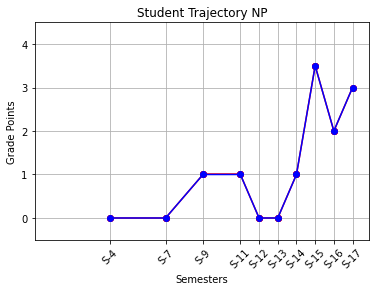

In [189]:
single_category_customize_median_line_chart(nested_dic[single_cat])

### For multiple category customize median line chart defination

In [190]:
def multiple_categories_customize_median_line_chart(data, type_list):
    num_plots = len(data)
    num_cols = int(math.ceil(math.sqrt(num_plots)))
    num_rows = int(math.ceil(num_plots / num_cols))
    
    colors = cm.rainbow(np.linspace(0, 1, num_plots))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))
    axes = axes.flatten()

    for count, (ax, (category, plot_data)) in enumerate(zip(axes[:num_plots], data.items())):
        color = colors[count % len(colors)]
        n = max(plot_data.keys())
        sorted_keys = sorted(plot_data.keys())
        median_values = [np.median(plot_data[key]) for key in sorted_keys]

        for i in range(len(sorted_keys)):
            x1 = sorted_keys[i]
            y_median = np.median(plot_data[x1])
            ax.scatter(x1, y_median, color=color)

            if i < len(sorted_keys) - 1:
                x2 = sorted_keys[i + 1]
                y1_median = np.median(plot_data[x1])
                y2_median = np.median(plot_data[x2])
                ax.plot([x1, x2], [y1_median, y2_median], marker='o', linestyle='-', color=color)

        ax.plot(sorted_keys, median_values, marker='o', linestyle='-', color=color, label='Median')

        ax.set_xlim(1, n)
        ax.set_xticks(sorted_keys)
        ax.set_xticklabels([f'S-{i}' for i in sorted_keys], rotation=45)
        ax.set_xlabel('Semesters')
        ax.set_ylabel('Grade Points')
        ax.set_title(f'Student Trajectory ({type_list[count]})')
        ax.grid(True)
        ax.set_ylim(-0.5, 4.5)
        ax.set_xlim(-0.01, n + 0.9)

    for ax in axes[num_plots:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

### Function call

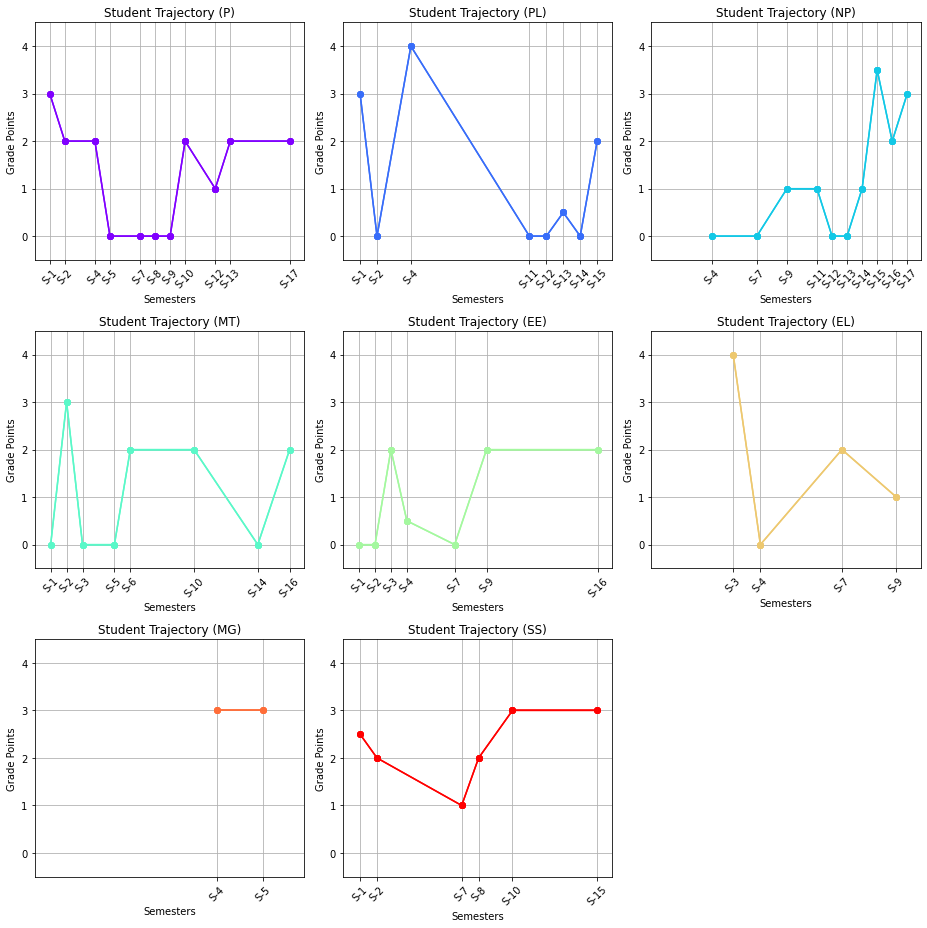

In [191]:
multiple_categories_customize_median_line_chart(nested_dic, type_list)

### For single category customize pair to pair line chart defination

In [192]:
def single_category_customize_pair_pair_line_chart(data):
    # Determine the category type based on single_cat value
    category_types = ['P', 'PL', 'NP', 'MT', 'EE', 'EL', 'MG', 'SS', 'SL']
    category_type = category_types[single_cat] if single_cat < len(category_types) else 'Unknown'

    # To maintain the order, keys are sorted
    sorted_keys = sorted(data.keys())

    # Plotting points for each key and connecting them to the next point
    for i in range(len(sorted_keys) - 1):
        x1 = sorted_keys[i]
        x2 = sorted_keys[i + 1]
        
        y1_values = data[x1]
        y2_values = data[x2]
        
        for y1 in y1_values:
            for y2 in y2_values:
                plt.plot([x1, x2], [y1, y2], marker='o', linestyle='-', color='red')
        
        # Plot individual points
        for y in y1_values:
            plt.scatter(x1, y, color='red')
        for y in y2_values:
            plt.scatter(x2, y, color='red')

    # Plotting the last semester points separately
    last_x = sorted_keys[-1]
    for y in data[last_x]:
        plt.scatter(last_x, y, color='red')

    plt.xticks(sorted_keys, [f'S-{i}' for i in sorted_keys], rotation=45)  # Only include x-axis points where data exists

    plt.xlabel('Semesters')
    plt.ylabel('Grade Points')
    plt.title(f'Student Trajectory {category_type}')

    plt.grid(True)
    plt.ylim(-0.5, 4.5)
    plt.xlim(sorted_keys[0] - 0.5, sorted_keys[-1] + 0.5)

    plt.show()


### Function call

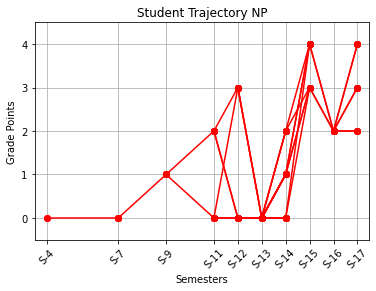

In [193]:
single_category_customize_pair_pair_line_chart(nested_dic[single_cat])

### For multiple category customize pair to pair line chart defination

In [194]:
def multiple_categories_customize_pair_pair_line_chart(data, type_list):
    num_plots = len(data)
    num_cols = int(math.ceil(math.sqrt(num_plots)))
    num_rows = int(math.ceil(num_plots / num_cols))
    
    colors = cm.rainbow(np.linspace(0, 1, num_plots))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))
    axes = axes.flatten()

    for count, (ax, (category, plot_data)) in enumerate(zip(axes[:num_plots], data.items())):
        color = colors[count % len(colors)]
        sorted_keys = sorted(plot_data.keys())

        # Plotting points for each key and connecting them to the next point
        for i in range(len(sorted_keys) - 1):
            x1 = sorted_keys[i]
            x2 = sorted_keys[i + 1]
            
            y1_values = plot_data[x1]
            y2_values = plot_data[x2]
            
            for y1 in y1_values:
                for y2 in y2_values:
                    ax.plot([x1, x2], [y1, y2], marker='o', linestyle='-', color=color)
            
            # Plot individual points
            for y in y1_values:
                ax.scatter(x1, y, color=color)
            for y in y2_values:
                ax.scatter(x2, y, color=color)

        # Plotting the last semester points separately
        last_x = sorted_keys[-1]
        for y in plot_data[last_x]:
            ax.scatter(last_x, y, color=color)

        n = max(plot_data.keys())
        ax.set_xticks(sorted_keys)
        ax.set_xticklabels([f'S-{i}' for i in sorted_keys], rotation=45)
        ax.set_xlabel('Semesters')
        ax.set_ylabel('Grade Points')
        ax.set_title(f'Student Trajectory ({type_list[count]})')
        ax.grid(True)
        ax.set_ylim(-0.5, 4.5)
        ax.set_xlim(sorted_keys[0] - 0.5, sorted_keys[-1] + 0.5)

    for ax in axes[num_plots:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

### Function call

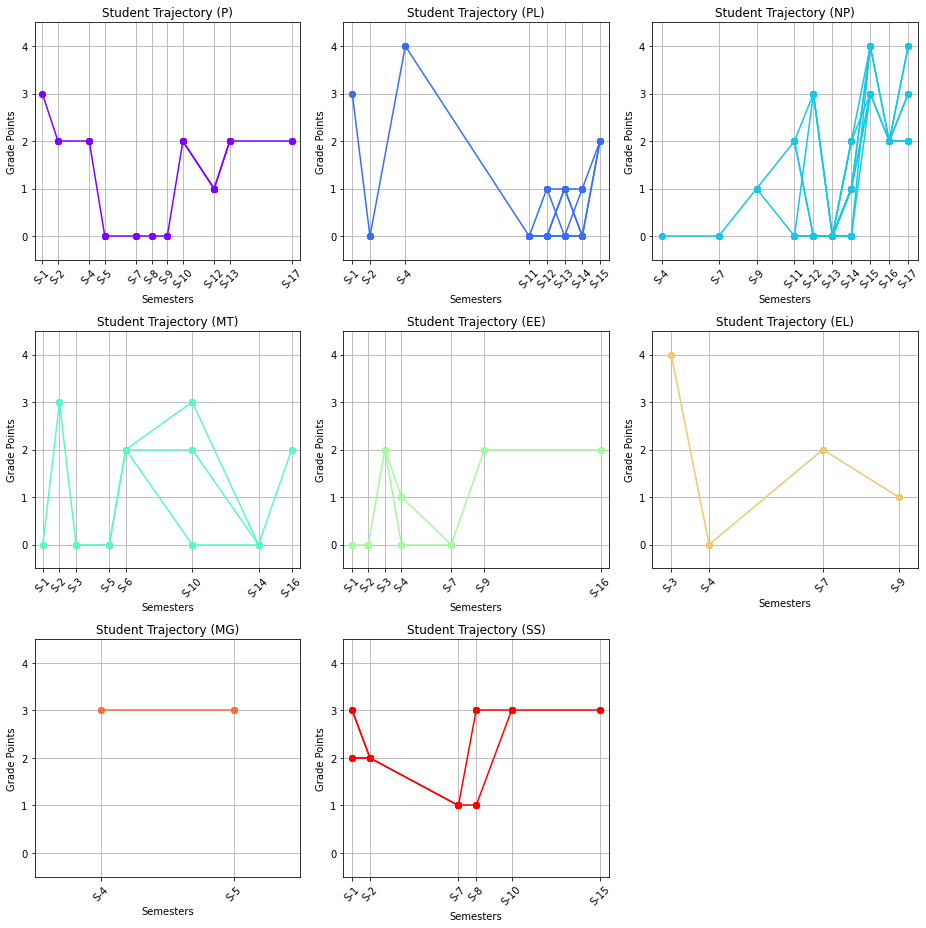

In [195]:
multiple_categories_customize_pair_pair_line_chart(nested_dic, type_list)